In [ ]:
#Seeds Classification Analysis

In [3]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

In [4]:
#load data
mydata = pd.read_csv("https://raw.githubusercontent.com/FerranDonoso/02-2020-Seeds-Data/master/seeds_dataset.txt",
                     delim_whitespace = True, header = None,
                     names = ["Area", "Perimeter", "Compactness",
                              "Length_of_kernel", "Width_of_kernel",
                              "Asymmetry_coefficient",
                              "Length_of_kernel_groove", "Class"])

In [6]:
mydata.describe()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Area                       210 non-null float64
Perimeter                  210 non-null float64
Compactness                210 non-null float64
Length_of_kernel           210 non-null float64
Width_of_kernel            210 non-null float64
Asymmetry_coefficient      210 non-null float64
Length_of_kernel_groove    210 non-null float64
Class                      210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
mydata["Class"] = pd.Categorical(mydata.Class)

In [9]:
#check for missing values
mydata.isnull().sum()

Area                       0
Perimeter                  0
Compactness                0
Length_of_kernel           0
Width_of_kernel            0
Asymmetry_coefficient      0
Length_of_kernel_groove    0
Class                      0
dtype: int64

In [10]:
#check for duplicated rows
mydata.duplicated().sum()

0

In [11]:
#near zero variance features
variance = mydata.var()
variance = variance.to_frame("variance")
variance

,variance
Area,8.466351
Perimeter,1.705528
Compactness,0.000558
Length_of_kernel,0.196305
Width_of_kernel,0.142668
Asymmetry_coefficient,2.260684
Length_of_kernel_groove,0.241553
Class,0.669856


In [12]:
#remove "compactness"
del mydata["Compactness"]

In [13]:
#define features and dependant variable
X = mydata[mydata.columns.difference(["Class"])]
y = mydata["Class"]

In [14]:
#check class balance
mydata["Class"].value_counts()

3    70
2    70
1    70
Name: Class, dtype: int64

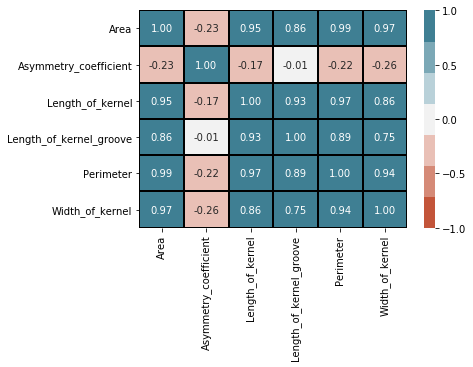

In [16]:
#correlation matrix between features
corr = X.corr()
ax = sn.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sn.diverging_palette(20, 220, n = 7),
                fmt = ".2f", linewidths = 1, linecolor = "black", annot = True,
                cbar_kws = {"ticks" : [-1, -.5, 0, 0.5, 1]})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [17]:
#anova test
Fval = []
pval = []
colN = list(mydata.columns.difference(["Class"]))

for i in colN:
    df = mydata[[i, "Class"]]
    F, p = stats.f_oneway(df[df.Class == 1][i],
                          df[df.Class == 2][i],
                          df[df.Class == 3][i])
    Fval.append(F)
    pval.append(p)

Table = pd.DataFrame(list(zip(colN, Fval, pval)), columns = ["Feature", "Fval", "pval"])
print(Table.to_string(index = False))

                 Feature        Fval          pval
                    Area  548.186479  1.964806e-83
   Asymmetry_coefficient   51.888109  5.427325e-19
        Length_of_kernel  322.185934  2.726363e-64
 Length_of_kernel_groove  368.950045  5.629776e-69
               Perimeter  541.579497  5.640999e-83
         Width_of_kernel  406.302031  2.139265e-72


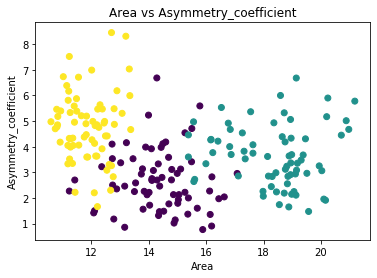

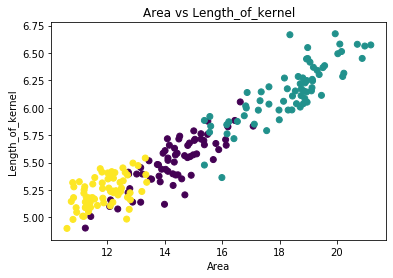

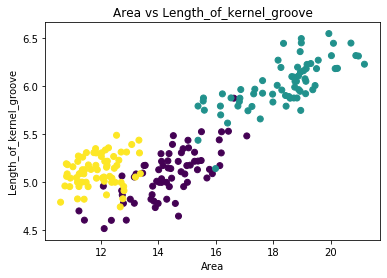

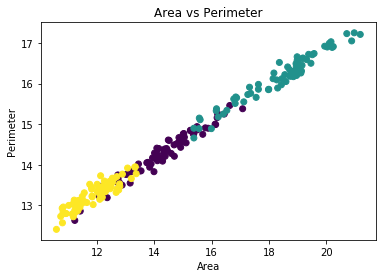

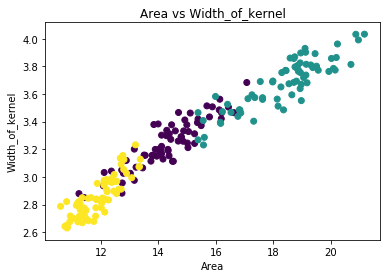

In [58]:
#scatter plot area vs features
x_col = "Area"
y_columns = list(X[X.columns.difference(["Area"])])

for y_col in y_columns:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(X[x_col], X[y_col], c = mydata["Class"])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    plt.show()

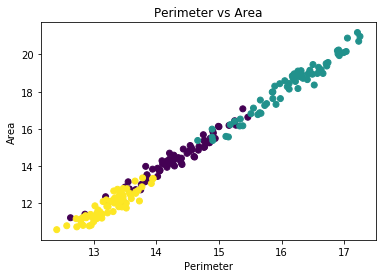

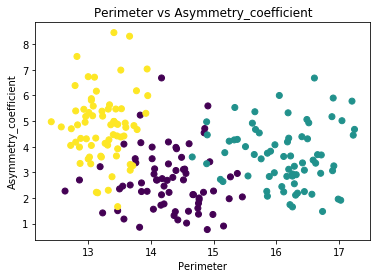

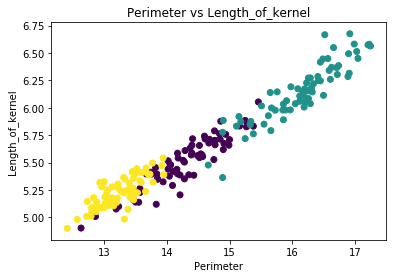

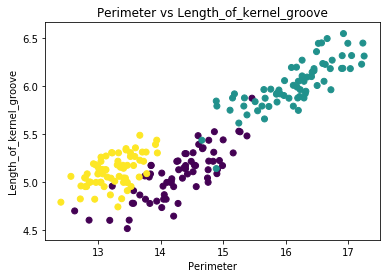

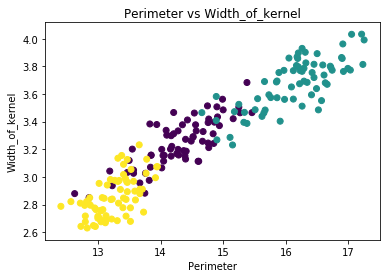

In [59]:
#scatter plot perimeter vs features
x_col = "Perimeter"
y_columns = list(X[X.columns.difference(["Perimeter"])])

for y_col in y_columns:
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(X[x_col], X[y_col], c = mydata["Class"])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    plt.show()

In [20]:
#define train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [21]:
#train shape
X_train.shape, y_train.shape

((147, 6), (147,))

In [22]:
#test shape
X_test.shape, y_test.shape

((63, 6), (63,))

In [23]:
#naive bayes for reference
clf0 = gnb()
clf0.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
#predictions
y_pred0 = clf0.predict(X_test)

In [26]:
#confusion matrix
labels = np.unique(y_test)
results0 = metrics.confusion_matrix(y_test, y_pred0)
cm0 = pd.DataFrame(results0, index = labels, columns = labels)

print("Confusion Matrix:")
print(cm0, "\n")
print("Accuracy Score:" "\t" "%.3f" % metrics.accuracy_score(y_test, y_pred0))
print("Kappa Score:" "\t" "%.3f" % metrics.cohen_kappa_score(y_test, y_pred0), "\n")
print("Report:")
print(metrics.classification_report(y_test, y_pred0))

Confusion Matrix:
    1   2   3
1  13   1   3
2   2  13   0
3   3   0  28 

Accuracy Score:	0.857
Kappa Score:	0.772 

Report:
              precision    recall  f1-score   support

           1       0.72      0.76      0.74        17
           2       0.93      0.87      0.90        15
           3       0.90      0.90      0.90        31

    accuracy                           0.86        63
   macro avg       0.85      0.84      0.85        63
weighted avg       0.86      0.86      0.86        63



In [27]:
#random forest
clf = rfc(n_estimators = 500, random_state = 123)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [28]:
#predictions
y_pred = clf.predict(X_test)

In [29]:
#confusion matrix
labels = np.unique(y_test)
results = metrics.confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(results, index = labels, columns = labels)

print("Confusion Matrix:")
print(cm, "\n")
print("Accuracy Score:" "\t" "%.3f" % metrics.accuracy_score(y_test, y_pred))
print("Kappa Score:" "\t" "%.3f" % metrics.cohen_kappa_score(y_test, y_pred), "\n")
print("Report:")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
    1   2   3
1  14   1   2
2   0  15   0
3   2   0  29 

Accuracy Score:	0.921
Kappa Score:	0.874 

Report:
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.94      1.00      0.97        15
           3       0.94      0.94      0.94        31

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [30]:
#normalize data sets
X_train_N = X_train.apply(lambda x: ((x - x.min()) / (x.max() - x.min())), axis = 0)
X_test_N = X_test.apply(lambda x: ((x - x.min()) / (x.max() - x.min())), axis = 0)


In [32]:
#optimal k
aa = list(range(1, 10))

for i in aa:
    clf1 = knnc(n_neighbors = i)
    clf1.fit(X_train_N, y_train)
    y_pred1 = clf1.predict(X_test_N)
    print("Accuracy Score for", i, "neighbors:","%.3f" % metrics.accuracy_score(y_test, y_pred1))

Accuracy Score for 1 neighbors: 0.857
Accuracy Score for 2 neighbors: 0.873
Accuracy Score for 3 neighbors: 0.889
Accuracy Score for 4 neighbors: 0.889
Accuracy Score for 5 neighbors: 0.905
Accuracy Score for 6 neighbors: 0.889
Accuracy Score for 7 neighbors: 0.873
Accuracy Score for 8 neighbors: 0.889
Accuracy Score for 9 neighbors: 0.921


In [33]:
#knn model with k = 9
clf1 = knnc(n_neighbors = 9)
clf1.fit(X_train_N, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [34]:
#predictions
y_pred1 = clf1.predict(X_test_N)

In [35]:
#confusion matrix
labels = np.unique(y_test)
results1 = metrics.confusion_matrix(y_test, y_pred1)
cm1 = pd.DataFrame(results1, index = labels, columns = labels)

print("Confusion Matrix:")
print(cm1, "\n")
print("Accuracy Score:" "\t" "%.3f" % metrics.accuracy_score(y_test, y_pred1))
print("Kappa Score:" "\t" "%.3f" % metrics.cohen_kappa_score(y_test, y_pred1), "\n")
print("Report:")
print(metrics.classification_report(y_test, y_pred1))

Confusion Matrix:
    1   2   3
1  16   1   0
2   0  15   0
3   4   0  27 

Accuracy Score:	0.921
Kappa Score:	0.877 

Report:
              precision    recall  f1-score   support

           1       0.80      0.94      0.86        17
           2       0.94      1.00      0.97        15
           3       1.00      0.87      0.93        31

    accuracy                           0.92        63
   macro avg       0.91      0.94      0.92        63
weighted avg       0.93      0.92      0.92        63



In [38]:
#summary
print("Summary", "\n")
print("Naive Bayes")
print("Accuracy Score:" "\t" "%.3f" % (metrics.accuracy_score(y_test, y_pred0)))
print("Kappa Score:" "\t" "%.3f" % (metrics.cohen_kappa_score(y_test, y_pred0)), "\n")
print("Random forest")
print("Accuracy Score:" "\t" "%.3f" % (metrics.accuracy_score(y_test, y_pred)))
print("Kappa Score:" "\t" "%.3f" % (metrics.cohen_kappa_score(y_test, y_pred)), "\n")
print("K-NN")
print("Accuracy Score:" "\t" "%.3f" % (metrics.accuracy_score(y_test, y_pred1)))
print("Kappa Score:" "\t""%.3f" % ( metrics.cohen_kappa_score(y_test, y_pred1)))

Summary 

Naive Bayes
Accuracy Score:	0.857
Kappa Score:	0.772 

Random forest
Accuracy Score:	0.921
Kappa Score:	0.874 

K-NN
Accuracy Score:	0.921
Kappa Score:	0.877
